In [1]:
import cv2,os
data_path="D:\\PythonFiles\\eyewear\\codes\\Create data\\1000 images\\eyewear_data\\lens_color"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
if __name__ == '__main__':
    print(label_dict)
    print(categories)
    print(labels)

{'Beige': 0, 'Black': 1, 'Blue': 2, 'Brown': 3, 'Clear': 4, 'Gold': 5, 'Green': 6, 'Grey': 7, 'Lavender': 8, 'Maroon': 9, 'Metallic': 10, 'Multi-Color': 11, 'Navy Blue': 12, 'Olive': 13, 'Orange': 14, 'Peach': 15, 'Pink': 16, 'Purple': 17, 'Red': 18, 'Rose Gold': 19, 'Silver': 20, 'Turquoise': 21, 'Violet': 22, 'White': 23, 'Yellow': 24}
['Beige', 'Black', 'Blue', 'Brown', 'Clear', 'Gold', 'Green', 'Grey', 'Lavender', 'Maroon', 'Metallic', 'Multi-Color', 'Navy Blue', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Red', 'Rose Gold', 'Silver', 'Turquoise', 'Violet', 'White', 'Yellow']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [2]:
import numpy as np
from keras.utils import np_utils

img_size = 255
data = []
label = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)

    for img_name in img_names:
        if img_name.endswith('.jpg' or '.JPG' or '.png'):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path)
            try:
                resized = cv2.resize(img, (img_size, img_size))
                # resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                label.append(label_dict[category])
                # appending the image and the label(categorized) into the list (dataset)
            except Exception as e:
                print('Exception:', e)
                # if any exception rasied, the exception will be printed here. And pass to the next image


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
label=np.array(label)
new_label=np_utils.to_categorical(label)
# print(new_label)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.2)

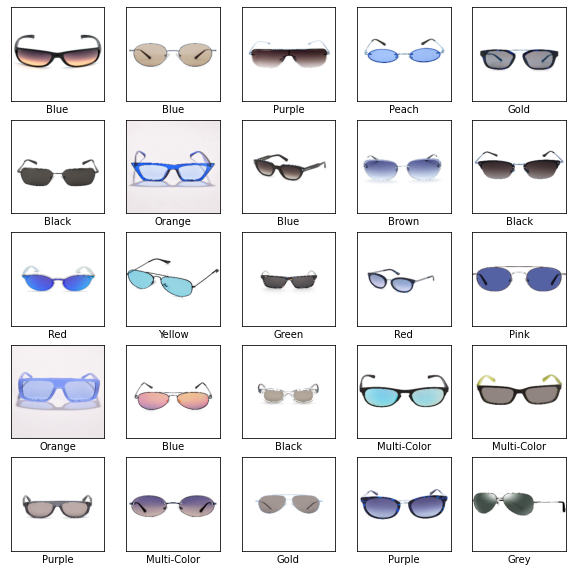

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_train[i]))
    plt.xlabel(categories[np.argmax(y_train[i])])
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D


# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=15, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/15
17/17 [==============================] - 40s 2s/step - loss: 3.5504 - accuracy: 0.0525
Epoch 2/15
17/17 [==============================] - 36s 2s/step - loss: 2.9812 - accuracy: 0.0720
Epoch 3/15
17/17 [==============================] - 34s 2s/step - loss: 2.6905 - accuracy: 0.2179
Epoch 4/15
17/17 [==============================] - 34s 2s/step - loss: 2.3817 - accuracy: 0.2996
Epoch 5/15
17/17 [==============================] - 35s 2s/step - loss: 2.0694 - accuracy: 0.3833
Epoch 6/15
17/17 [==============================] - 34s 2s/step - loss: 1.6952 - accuracy: 0.4844
Epoch 7/15
17/17 [==============================] - 34s 2s/step - loss: 1.5392 - accuracy: 0.5292
Epoch 8/15
17/17 [==============================] - 34s 2s/step - loss: 1.2337 - accuracy: 0.6265
Epoch 9/15
17/17 [==============================] - 34s 2s/step - loss: 0.8219 - accuracy: 0.7549
Epoch 10/15
17/17 [==============================] - 34s 2s/step - loss: 0.6457 - accuracy: 0.8113
Epoch 11/15
17/17 [

In [7]:
model.save('lens_color_model.h5')